44100
10.666643990929705
Delta t = 2.2675736961451248e-05 seconds.
En una centesima de segundo hay 4410.0


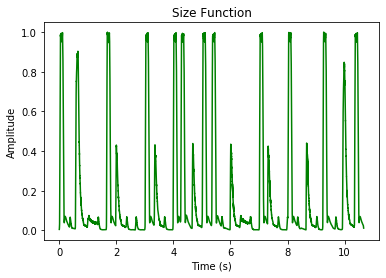

In [7]:
import numpy as np
from scipy.io.wavfile import read
import matplotlib.pyplot as plt
from scipy.signal import hilbert
import moviepy.editor as mpy

VIDEO_SIZE = (1920, 1080)
BLACK = (0, 0, 0)
LOGO_PATH = "/home/nestor/Imágenes/Imagenes_LD/New_Prueba_Loop.wav"

input_data = read("/home/nestor/Imágenes/Imagenes_LD/New_Prueba_Loop.wav")
fs = input_data[0]
audio = input_data[1]
amp = audio[:, 0]
t = np.arange(amp.size) / fs
envelope = np.abs(hilbert(amp))

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

envelope = smooth(envelope, 1000)
envelope = envelope / np.amax(envelope)

print(fs)
print(t[-1])
print("Delta t = " + str(t[1] - t[0]) + " seconds.")
print("En una centesima de segundo hay " + str(0.1 / (t[1] - t[0])))
plt.plot(t, envelope, 'g')
plt.ylabel("Amplitude")
plt.xlabel("Time (s)")
plt.title("Size Function")
plt.show()

# SCR_H = 700
# image = pygame.image.load('/home/nestor/Imágenes/Imagenes_LD/Nasa_Eagle_N.jpg')
# imSize = imWidth, imHeight = image.get_size()[0] , image.get_size()[1]
# size = width, height = int(SCR_H * (imWidth / imHeight)), int(SCR_H)
# r_image = pygame.Surface((width, height))
# r_image = pygame.transform.smoothscale(image, (width, height))
# lil_image = pygame.image.load('/home/nestor/Imágenes/Imagenes_LD/square.png')

# lil_size = lil_width, lil_height = 300, 300
# lil_r_image = pygame.Surface(lil_size)
# lil_r_image = pygame.transform.smoothscale(lil_image, lil_size)

# bgColor = 25, 25, 25
# WHITE = 255, 255, 255

# screen = pygame.display.set_mode(size, pygame.RESIZABLE)
# screen.fill(WHITE)
# screen.blit(r_image, (0, 0))
# screen.blit(lil_r_image, (int((width - lil_width) / 2), int((height - lil_height) / 2)))

# pause = True

# while 1:
    
#     event = pygame.event.get()
#     for e in event:
#         if e.type == pygame.KEYDOWN:
#             pause = not pause
#         mouseClick = pygame.mouse.get_pressed()
#         if sum(mouseClick) > 0:
#             posMx, posMy = pygame.mouse.get_pos()
#             cellMx, cellMy = int(np.floor(posMx / dimCellW)), int(np.floor(posMy / dimCellH))
#             tmp_gState[cellMx, cellMy] = not mouseClick[2]
#         if e.type == pygame.QUIT : 
#             pygame.quit() 
#             quit() 
        
#     time.sleep(0.03)
#     pygame.display.flip()
#     pygame.display.update()